# Proyecto: Predicción de Alertas Térmicas mediante Aprendizaje Automático

Alumno: Mariano Buet

Se propone desarrollar un modelo de clasificación multiclase que prediga tres tipos de estados térmicos —riesgo de helada, clima de confort y riesgo de sobrecalor— a partir de variables meteorológicas.
El objetivo principal es anticipar condiciones extremas para apoyar la toma de decisiones preventivas en distintos ámbitos: agrícola (proteger cultivos), doméstico (evitar congelamiento de cañerías) e industrial (ajustar sistemas de ventilación o riego)

In [86]:
# Librerías principales
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
# Leer el archivo Excel directamente desde GitHub
url = "https://github.com/MarianoBuet/Aprendizaje-Autom-tico/raw/main/Entregas_Parcial/datos/Estad%C3%ADsticas%20normales%20Datos%20abiertos%201991-2020%20-%20AJUSTADO.xlsx"

df = pd.read_excel(url,header=0)
# Mostrar las primeras filas
df.head()

,Estacion,Mes,Dias de Lluvia,Humeda,Nubosidad,Precipitacion,Temp Media,Temp Max,Temp Min,Viento,Objetivo
0,AEROPARQUE AERO,Ene,6.7,67.0,3.1,117.5,24.5,28.4,20.8,16.8,NORMAL
1,AEROPARQUE AERO,Feb,6.0,69.8,3.2,112.3,23.7,27.3,20.2,15.8,NORMAL
2,AEROPARQUE AERO,Mar,5.9,71.3,3.1,111.8,22.0,25.5,18.8,14.9,NORMAL
3,AEROPARQUE AERO,Abr,6.6,73.6,3.5,108.3,18.5,22.0,15.3,13.9,NORMAL
4,AEROPARQUE AERO,May,5.0,76.4,4.0,83.3,15.2,18.4,12.3,12.9,NORMAL


# Analisis General del Set de Datos

Estructura General y tipos de variables

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171 entries, 0 to 1170
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Estacion        1171 non-null   object 
 1   Mes             1171 non-null   object 
 2   Dias de Lluvia  1061 non-null   float64
 3   Humeda          1110 non-null   float64
 4   Nubosidad       1166 non-null   float64
 5   Precipitacion   1061 non-null   float64
 6   Temp Media      1167 non-null   float64
 7   Temp Max        1158 non-null   float64
 8   Temp Min        1124 non-null   float64
 9   Viento          708 non-null    float64
 10  Objetivo        1171 non-null   object 
dtypes: float64(8), object(3)
memory usage: 100.8+ KB


Analisis de los valores nulos

In [89]:
print("\nValores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
Estacion            0
Mes                 0
Dias de Lluvia    110
Humeda             61
Nubosidad           5
Precipitacion     110
Temp Media          4
Temp Max           13
Temp Min           47
Viento            463
Objetivo            0
dtype: int64


Analisis Estadístico Rapido

In [90]:
display(df.describe(percentiles=[0.25,0.5,0.75]).T)

,count,mean,std,min,25%,50%,75%,max
Dias de Lluvia,1061.0,5.097455,2.536586,0.0,3.100,5.2,7.0,13.8
Humeda,1110.0,68.005405,11.027475,25.7,61.325,70.1,76.4,90.2
Nubosidad,1166.0,3.840137,0.888284,1.3,3.300,3.7,4.2,7.5
Precipitacion,1061.0,68.234873,51.674519,0.0,23.300,58.9,106.5,277.9
Temp Media,1167.0,14.834190,8.178787,-20.9,10.300,15.7,21.2,28.3
Temp Max,1158.0,21.223834,8.938676,-17.5,17.025,22.4,27.9,35.5
Temp Min,1124.0,9.102847,7.778743,-25.0,4.500,9.9,15.1,22.5
Viento,708.0,13.011582,5.554040,3.9,9.200,11.8,15.9,36.5


Analisis de las variables numéricas

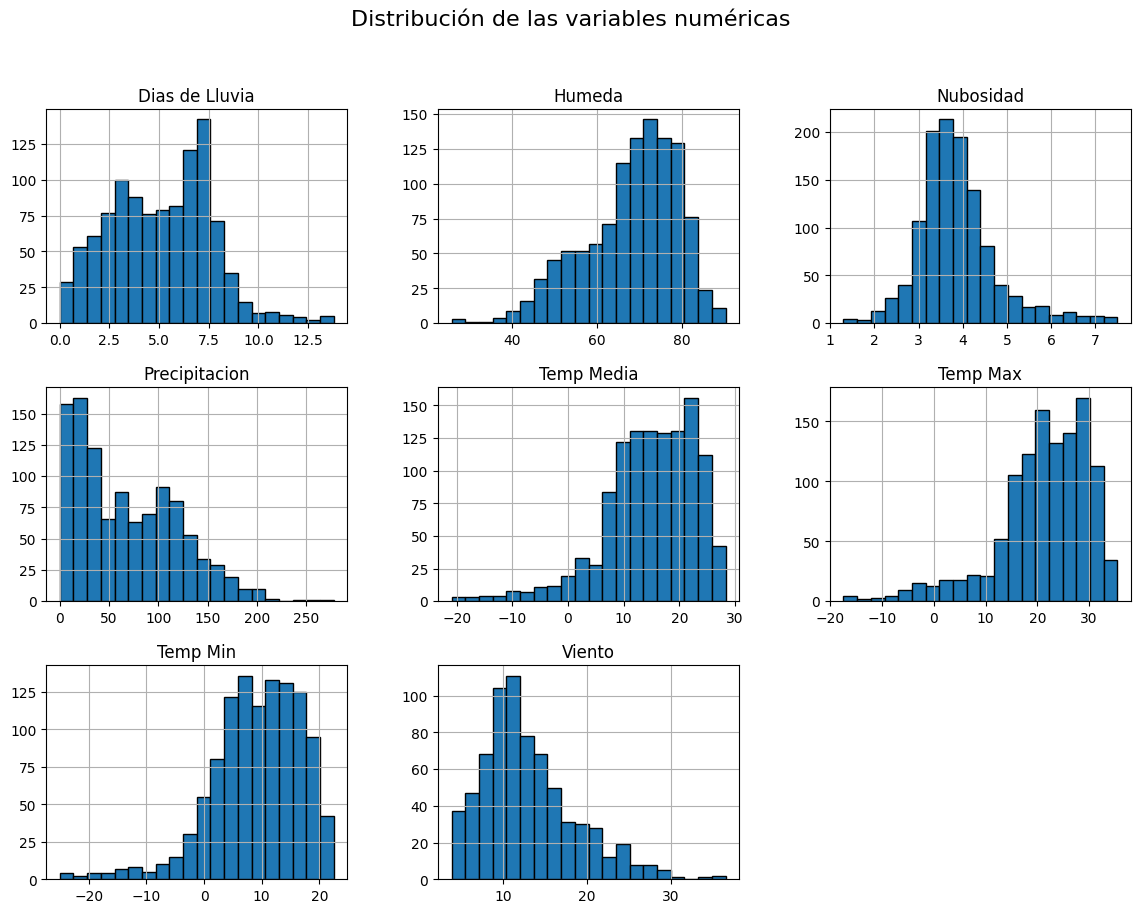

In [91]:
variables_numericas = df.select_dtypes(include=['float64', 'int64']).columns

df[variables_numericas].hist(figsize=(14, 10), bins=20, edgecolor='black')
plt.suptitle("Distribución de las variables numéricas", fontsize=16)
plt.show()

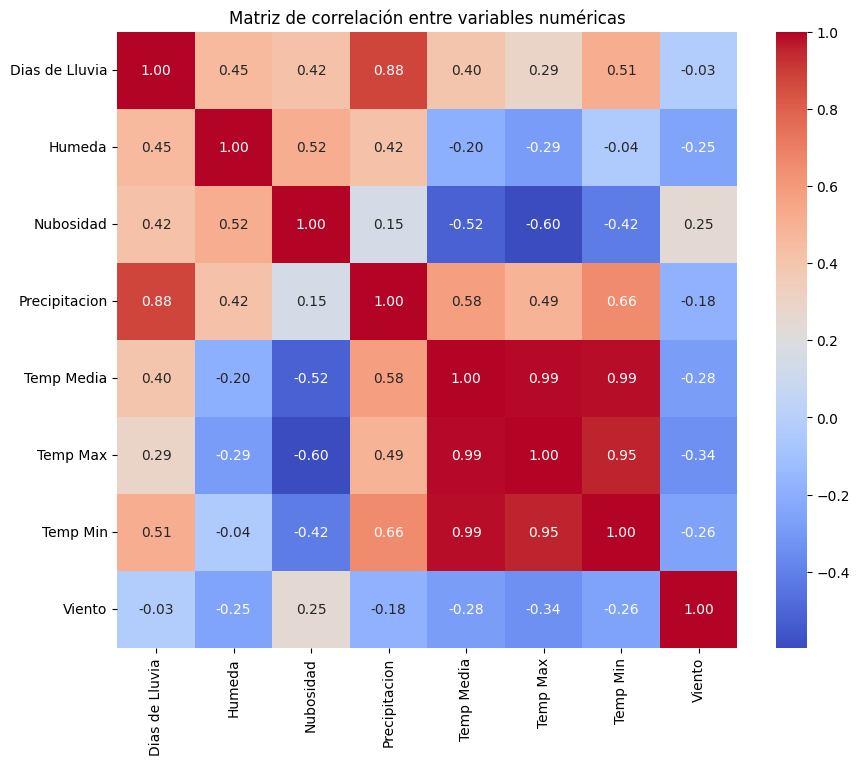

In [92]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[variables_numericas].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

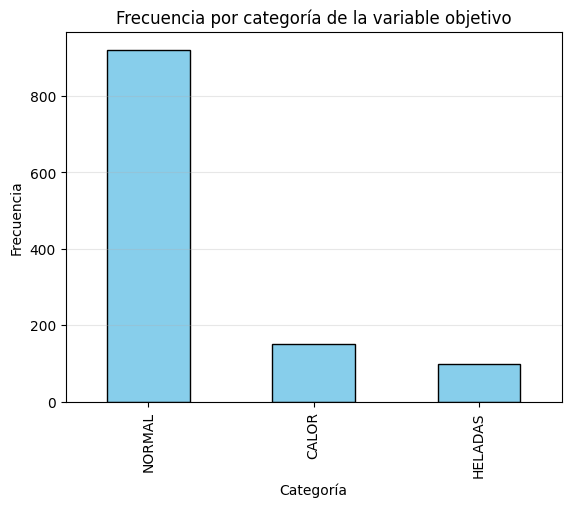

In [93]:
#Visualizar con un histograma la distribucion de la variable objetivo

df['Objetivo'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frecuencia por categoría de la variable objetivo')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.3)
plt.show()

In [94]:
#  Mostrar columnas con valores nulos
faltantes = df.isnull().sum()
faltantes = faltantes[faltantes > 0]

if faltantes.empty:
    print("✅ No hay valores nulos en el dataset.")
else:
    print("📊 Columnas con valores nulos:")
    display(faltantes)

#  Definir manualmente qué columnas usarán cada método


#Columnas que usaran la media
cols_media = ['Temp Media','Viento','Dias de Lluvia']

#Columnas que usaran la mediana
cols_mediana = ['Humeda','Precipitacion']

#Columnas que usaran Moda
cols_moda = ['Temp Min', 'Temp Max','Nubosidad']

#Aplicar Media
for col in cols_media:
    if col in df.columns:
        mean_value = df[col].mean()
        df[col].fillna(mean_value, inplace=True)
        print(f"✅ Columna '{col}' completada con la MEDIA ({mean_value:.2f})")
    else:
        print(f"⚠️ La columna '{col}' no existe en el dataset")

# Aplicar Mediana
for col in cols_mediana:
    if col in df.columns:
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)
        print(f"✅ Columna '{col}' completada con la MEDIANA ({median_value:.2f})")
    else:
        print(f"⚠️ La columna '{col}' no existe en el dataset")

# 5️⃣ Aplicar Opción 3 (moda)
for col in cols_moda:
    if col in df.columns:
        moda_series = df[col].mode(dropna=True)
        if len(moda_series) > 0:
            moda_val = moda_series.iloc[0]
            df[col].fillna(moda_val, inplace=True)
            print(f"✅ Columna '{col}' completada con la MODA ({moda_val})")
        else:
            print(f"⚠️ Columna '{col}' no tiene suficiente información para calcular la moda")
    else:
        print(f"⚠️ La columna '{col}' no existe en el dataset")

# 6️⃣ Verificación final
faltantes_final = df.isnull().sum()
if faltantes_final.sum() == 0:
    print("\n🎉 Todas las columnas quedaron completas, sin valores nulos.")
else:
    print("\n⚠️ Aún quedan valores nulos en las siguientes columnas:")
    print(faltantes_final[faltantes_final > 0])

📊 Columnas con valores nulos:


,0
Dias de Lluvia,110
Humeda,61
Nubosidad,5
Precipitacion,110
Temp Media,4
Temp Max,13
Temp Min,47
Viento,463


✅ Columna 'Temp Media' completada con la MEDIA (14.83)
✅ Columna 'Viento' completada con la MEDIA (13.01)
✅ Columna 'Dias de Lluvia' completada con la MEDIA (5.10)
✅ Columna 'Humeda' completada con la MEDIANA (70.10)
✅ Columna 'Precipitacion' completada con la MEDIANA (58.90)
✅ Columna 'Temp Min' completada con la MODA (4.9)
✅ Columna 'Temp Max' completada con la MODA (27.9)
✅ Columna 'Nubosidad' completada con la MODA (3.7)

🎉 Todas las columnas quedaron completas, sin valores nulos.


/tmp/ipython-input-3370797599.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_value, inplace=True)
/tmp/ipython-input-3370797599.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [95]:
print("\nValores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
Estacion          0
Mes               0
Dias de Lluvia    0
Humeda            0
Nubosidad         0
Precipitacion     0
Temp Media        0
Temp Max          0
Temp Min          0
Viento            0
Objetivo          0
dtype: int64


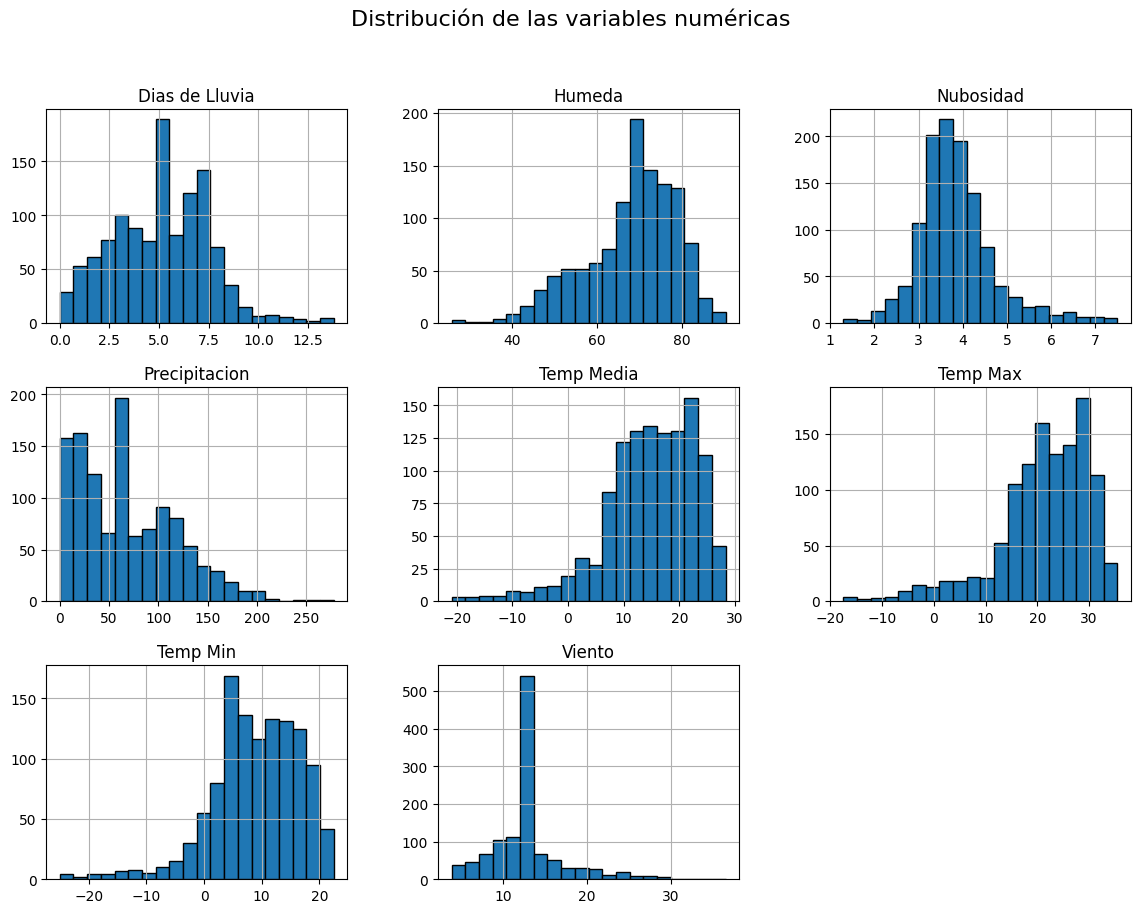

In [96]:
variables_numericas = df.select_dtypes(include=['float64', 'int64']).columns

df[variables_numericas].hist(figsize=(14, 10), bins=20, edgecolor='black')
plt.suptitle("Distribución de las variables numéricas", fontsize=16)
plt.show()

# División del dataset en Entrenamiento y Test

In [97]:

from sklearn.model_selection import train_test_split


X = df.drop(columns=['Objetivo']) #Aca qyeda el set de datos sin la variable objetivo, solo las predictoctoras
y = df['Objetivo']

# División en conjuntos de entrenamiento (80%) y test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42,stratify=y) #stratify mantiene las proporciones de la distribucion

# Confirmar tamaños
print("✅ División completada:")
print(f"Entrenamiento: {X_train.shape[0]} filas ({X_train.shape[1]} variables)")
print(f"Test:          {X_test.shape[0]} filas ({X_test.shape[1]} variables)")

# Verificar distribución de clases
print("\nDistribución de clases en Entrenamiento:")
print(y_train.value_counts(normalize=True).round(3))

print("\nDistribución de clases en Test:")
print(y_test.value_counts(normalize=True).round(3))

✅ División completada:
Entrenamiento: 936 filas (10 variables)
Test:          235 filas (10 variables)

Distribución de clases en Entrenamiento:
Objetivo
NORMAL     0.786
CALOR      0.130
HELADAS    0.083
Name: proportion, dtype: float64

Distribución de clases en Test:
Objetivo
NORMAL     0.787
CALOR      0.128
HELADAS    0.085
Name: proportion, dtype: float64


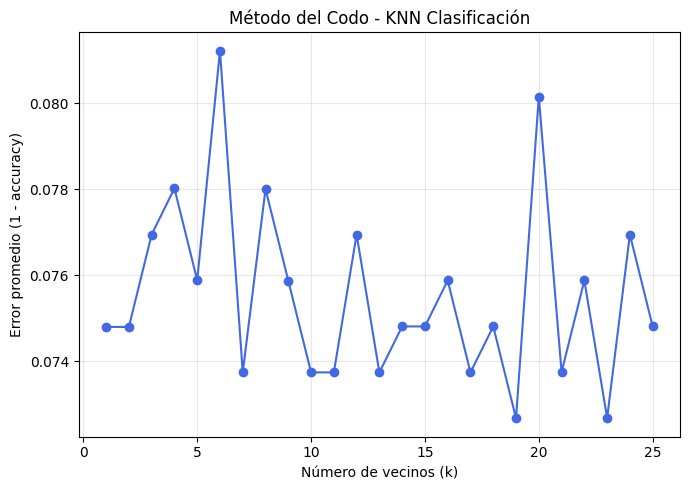

🏁 K óptimo según método del codo: 19


In [98]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# 1️⃣ Usamos solo variables numéricas
num_cols = X_train.select_dtypes(include=[np.number]).columns
Xtr = X_train[num_cols].copy()
Xte = X_test[num_cols].copy()

# 2️⃣ Escalado (recomendado para KNN)
scaler = StandardScaler()
Xtr_s = scaler.fit_transform(Xtr)
Xte_s = scaler.transform(Xte)

# 3️⃣ Definir rango de k
ks = range(1, 26)   # probamos k de 1 a 25
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 4️⃣ Calcular error medio (1 - accuracy) en CV
error_mean = []
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance', p=2)
    scores = cross_val_score(knn, Xtr_s, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
    error_mean.append(1 - scores.mean())

# 5️⃣ Graficar método del codo
plt.figure(figsize=(7,5))
plt.plot(ks, error_mean, marker='o', linestyle='-', color='royalblue')
plt.title('Método del Codo - KNN Clasificación')
plt.xlabel('Número de vecinos (k)')
plt.ylabel('Error promedio (1 - accuracy)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 6️⃣ Mostrar el K con menor error
best_k = ks[int(np.argmin(error_mean))]
print(f"🏁 K óptimo según método del codo: {best_k}")

=== Reporte de Clasificación (TEST) ===
              precision    recall  f1-score   support

       CALOR      0.808     0.700     0.750        30
     HELADAS      0.947     0.900     0.923        20
      NORMAL      0.942     0.968     0.955       185

    accuracy                          0.928       235
   macro avg      0.899     0.856     0.876       235
weighted avg      0.925     0.928     0.926       235



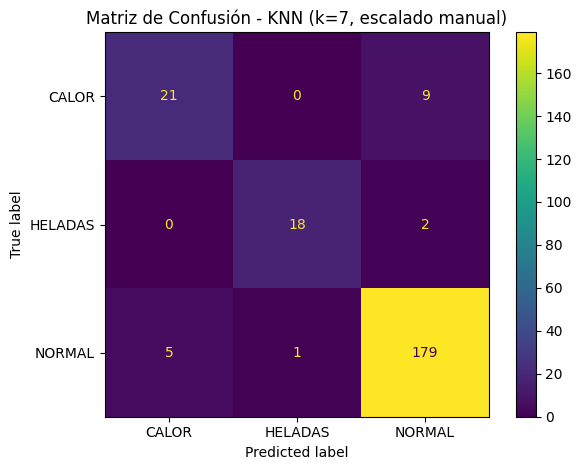

In [100]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

num_cols = X_train.select_dtypes(include=[np.number]).columns
Xtr = X_train[num_cols].copy()
Xte = X_test[num_cols].copy()

# Escalado MANUAL
scaler = StandardScaler()
Xtr_s = scaler.fit_transform(Xtr)
Xte_s = scaler.transform(Xte)

# KNN (suele rendir mejor con weights='distance')
knn = KNeighborsClassifier(n_neighbors=3, weights='distance', p=2)
knn.fit(Xtr_s, y_train)

y_pred = knn.predict(Xte_s)
print("=== Reporte de Clasificación (TEST) ===")
print(classification_report(y_test, y_pred, digits=3))

cm = confusion_matrix(y_test, y_pred, labels=sorted(y_test.unique()))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(y_test.unique()))
disp.plot(values_format="d")
plt.title("Matriz de Confusión - KNN (k=7, escalado manual)")
plt.tight_layout()
plt.show()